# **Explicit 1D Diffusion with Dirichlet Boundary Condition**

## **Neumann Boundary Condition**

In [ ]:
east_boundary_heat = 100
weast_boundary_heat = 100

k = ke = kw =  1 #int(input("enter the value of heat coefficent")) #assumption is that the value of k is not changing wrt to distance
delv = 1
delx = delxe = delxw = 1 #assumption is that the uniform mesh we are considering
A = Ae = Aw = 1 #assumtion is that the width of the cell is uniform

east_boundary_temperature = (east_boundary_heat*delx)/(A*k)
weast_boundary_temperature = (weast_boundary_heat*delx)/(A*k)

## **Mixed Boundary Condition**

In [ ]:
east_boundary_heat = 100
weast_boundary_heat = 100
h = 1 #convection coeffient


k = ke = kw =  1 #int(input("enter the value of heat coefficent")) #assumption is that the value of k is not changing wrt to distance
delv = 1
delx = delxe = delxw = 1 #assumption is that the uniform mesh we are considering
A = Ae = Aw = 1 #assumtion is that the width of the cell is uniform

east_boundary_free_stream_temperature = 100
weast_boundary_free_stream_temperature = 100

east_boundary_temperature = east_boundary_free_stream_temperature + (east_boundary_heat*(k + h *(delx/2))/k)
weast_boundary_temperature = weast_boundary_free_stream_temperature + (weast_boundary_heat*(k + h *(delx/2))/k)

## **Program**

[100.   0.   0.   0.   0.   0.   0.   0.   0. 100.]
[20. 20. 20. 20. 20. 20. 20. 20. 20. 20.]
[100.  20.  20.  20.  20.  20.  20.  20.  20. 100.]
[100.  60.  20.  20.  20.  20.  20.  20.  60. 100.]
[100.  60.  40.  20.  20.  20.  20.  40.  60. 100.]
[100.  70.  40.  30.  20.  20.  30.  40.  70. 100.]
[100.  70.  50.  30.  25.  25.  30.  50.  70. 100.]
[100.   75.   50.   37.5  27.5  27.5  37.5  50.   75.  100. ]
[100.    75.    56.25  38.75  32.5   32.5   38.75  56.25  75.   100.  ]
[100.     78.125  56.875  44.375  35.625  35.625  44.375  56.875  78.125
 100.   ]
[100.      78.4375  61.25    46.25    40.      40.      46.25    61.25
  78.4375 100.    ]
[100.       80.625    62.34375  50.625    43.125    43.125    50.625
  62.34375  80.625   100.     ]
[100.        81.171875  65.625     52.734375  46.875     46.875
  52.734375  65.625     81.171875 100.      ]


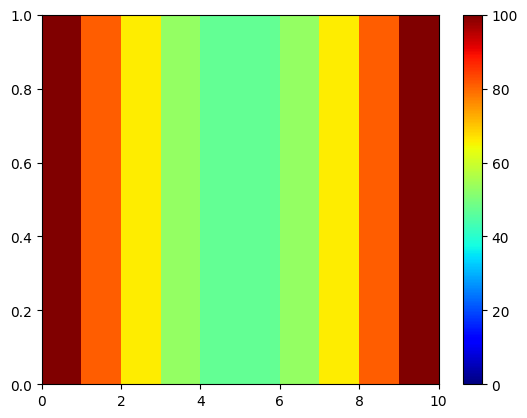

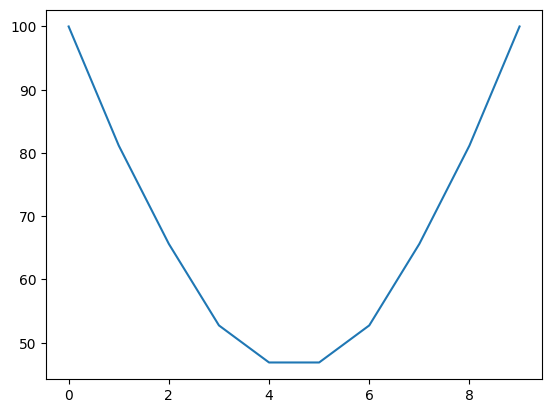

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

num_cell = 10#int(input("enter the number of cell in 1D : "))
east_boundary_codition = 100
weast_boundary_codition = 100

k = ke = kw =  1 #int(input("enter the value of heat coefficent")) #assumption is that the value of k is not changing wrt to distance
delv = 1 #int(input("enter the value of delv")) #assumption is that the value of delv is not changing wrt to distance
delx = delxe = delxw = 1 #assumption is that the uniform mesh we are considering
A = Ae = Aw = 1 #assumtion is that the width of the cell is uniform
Sp = 0
Sc = 0

ae = (ke*Ae)/delxe #also applied when unifrom mesh outher wise in loop
aw = (kw*Aw)/delxw #also applied when unifrom mesh outher wise in loop
ap_o = 2
ap = ap_o + ae +aw
ap_0 = ae + ap
ap_last = aw + ap
b = np.zeros(num_cell) + Sc*delv
X = np.zeros(num_cell) + 20

#for east boundary conditon
ape = aw + Sp*delv
apw = aw + Sp*delv
b[-1] = (east_boundary_codition + Sc*delv)

#for weast boundary conditon
apw = ae + Sp*delv
b[0] = (weast_boundary_codition + Sc*delv)

print(b)
print(X)

T = X # Plate is initially as 20 degres C
# Boundary Conditions 

T[0] = b[0]
T[-1] = b[-1]

print(T)
fig, axis = plt.subplots()
pcm = axis.pcolormesh([T], cmap=plt.cm.jet, vmin=0, vmax=100)
plt.colorbar(pcm, ax=axis)

for j in range (0,10):
    k = T.copy()
    k[0] = 100
    k[-1] = 100
    for i in range (1,num_cell-1):
        k[i] = (T[i-1]+T[i+1])/ap_o
    T = k
    print(k)
    k[0] = 100
    k[-1] = 100
pcm.set_array([T])
plt.show()
plt.plot(T)
plt.show()
